# Code benchmark 
Using the implemented function let's perform a benchmark of the quantum calculation

In [1]:
# Module import
import pandas as pd
import numpy as np
import exact_diagonalization as ed
import matplotlib.pyplot as plt

In [2]:
# to use interact
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Test construction/distruction operators
the syntax to call operators<br/>
d_1u --> d/c = destruction/creatrion <br/>
         1/2 = site<br/>
         u/d = up/down<br/>

In [3]:
print(ed.anti_comm(ed.c_2d,ed.d_2d).trace())
print(ed.anti_comm(ed.c_1d,ed.d_2d).trace())

(16+0j)
0j


In [4]:
# declare initial state
in_st = ed.initial_state(ed.p,ed.n,ed.n,ed.p)

In [5]:
@interact(T=2,V=4)
def plot_time_ev(T,V):
    results = []
    t = np.arange(0,2*np.pi,0.01)
    for i in t:
        fin_state = np.dot(np.exp(i*1j*ed.H(V,T)),in_st)
        results.append(np.dot(np.dot(fin_state,np.dot(ed.n_1u,ed.n_1d)),fin_state).real)
    return plt.plot(t,results)


interactive(children=(IntSlider(value=2, description='T', max=6, min=-2), IntSlider(value=4, description='V', …

In [70]:
in_st = ed.initial_state(ed.p,ed.n,ed.n,ed.n)
np.dot(np.dot(in_st,ed.n_1d),in_st)

(1+0j)

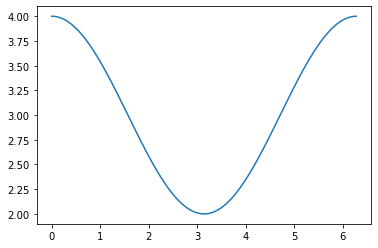

In [73]:
in_st = ed.initial_state(ed.p,ed.p,ed.n,ed.n)
results = []
re=[]
tc = np.arange(0,2*np.pi,0.01)
for i in tc:
    fin_state = np.dot(np.exp(-i*1j*ed.Hmod(1)),in_st)
    re.append(fin_state)
    results.append(np.dot(np.dot(fin_state,np.dot(ed.n_1d,ed.n_2u)),fin_state).real)
    #results.append(np.dot(fin_state,in_st))
plt.plot(tc,results)

In [24]:
in_st = ed.initial_state(ed.p,ed.n,ed.n,ed.n)
in_st

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
ii=np.kron(np.kron(np.kron(ed.p,ed.n,np.kron(ed.n,ed.n))))
ii

TypeError: kron() takes 2 positional arguments but 3 were given

In [28]:
import qutip as qt
init_state = qt.tensor([qt.basis(2,1), qt.basis(2,0), qt.basis(2,0), qt.basis(2,0)])
init_state.full

<bound method Qobj.full of Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]>

In [37]:
qt.basis

TypeError: unsupported operand type(s) for @: 'function' and 'Qobj'

In [48]:
ed.pauli_operators[2]@ed.p

array([1.+0.j, 0.+0.j])

In [54]:
in_st = ed.initial_state(ed.p,ed.p,ed.n,ed.n)
(ed.Hmod(1)@in_st).real

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. , -0.5,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ])

In [55]:
in_st

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
in_st1 = ed.initial_state(ed.n,ed.p,ed.p,ed.n)
in_st1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])